In [219]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import tensorflow as tf
import sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, SimpleRNN, Dropout , concatenate,  Input
from matplotlib import pyplot as plt


In [279]:
DataSet = pd.read_csv('/Users/qasimk/Downloads/ML/data/data1.csv')
DataSet.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


In [280]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [221]:
Target = ['stator_winding', 'stator_tooth','stator_yoke' ,'torque' ]

X = DataSet[DataSet['profile_id'] != 20].drop(columns = [ 'stator_winding', 'stator_tooth','stator_yoke' ,'torque' ,'profile_id'])
y = DataSet[Target][DataSet['profile_id'] != 20]

X_test = DataSet[DataSet['profile_id'] == 20].drop(columns = ['stator_winding', 'stator_tooth','stator_yoke' ,'torque' ,'profile_id'])
y_test = DataSet[Target][DataSet['profile_id'] == 20]

scaler1 = StandardScaler()
scaler2 = StandardScaler()
X = scaler1.fit_transform(X)
y = scaler2.fit_transform(np.asarray(y).reshape(-1, 4))

X_test = scaler1.transform(X_test)
y_test = scaler2.transform(np.asarray(y_test).reshape(-1, 4))

X_train, X_rnn, y_train, y_rnn = train_test_split(X,y, test_size = 0.5,shuffle=False)

In [223]:
def training(model_name,epochs_n,batch_size_n, X_train, X_val, y_train, y_val,h = False ):
    
    reconstructed_model = keras.models.load_model(model_name)
    history = reconstructed_model.fit(X_train, y_train, epochs = epochs_n, batch_size = batch_size_n,verbose=True,validation_data=(X_val, y_val))
    reconstructed_model.save(model_name)

    if h == True:
        return history

In [224]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.6)

training("dnn1",5,32,X_train, X_val, y_train, y_val)
training("dnn2",5,32,X_train, X_val, y_train, y_val)
training("dnn3",5,32,X_train, X_val, y_train, y_val)
training("dnn4",5,64,X_train, X_val, y_train, y_val)

Epoch 1/5
16086/16086 [==============================] - 82s 5ms/step - loss: 0.0676 - val_loss: 0.0578
Epoch 2/5
16086/16086 [==============================] - 96s 6ms/step - loss: 0.0568 - val_loss: 0.0554
Epoch 3/5
16086/16086 [==============================] - 90s 6ms/step - loss: 0.0547 - val_loss: 0.0535
Epoch 4/5
16086/16086 [==============================] - 173s 11ms/step - loss: 0.0533 - val_loss: 0.0529
Epoch 5/5
16086/16086 [==============================] - 62s 4ms/step - loss: 0.0526 - val_loss: 0.0515
INFO:tensorflow:Assets written to: dnn1/assets
Epoch 1/5
16086/16086 [==============================] - 67s 4ms/step - loss: 100.7421 - val_loss: 88.4499
Epoch 2/5
16086/16086 [==============================] - 63s 4ms/step - loss: 77.2123 - val_loss: 67.0757
Epoch 3/5
16086/16086 [==============================] - 64s 4ms/step - loss: 65.4833 - val_loss: 54.7604
Epoch 4/5
16086/16086 [==============================] - 63s 4ms/step - loss: 56.1507 - val_loss: 61.4232
Epoch 

In [227]:
history = training("enn",20,32, X_train, X_val, y_train, y_val,True)

Epoch 1/20
32172/32172 [==============================] - 228s 6ms/step - loss: 0.0466 - val_loss: 0.0435
Epoch 2/20
32172/32172 [==============================] - 102s 3ms/step - loss: 0.0410 - val_loss: 0.0392
Epoch 3/20
32172/32172 [==============================] - 102s 3ms/step - loss: 0.0388 - val_loss: 0.0384
Epoch 4/20
32172/32172 [==============================] - 101s 3ms/step - loss: 0.0372 - val_loss: 0.0364
Epoch 5/20
32172/32172 [==============================] - 100s 3ms/step - loss: 0.0363 - val_loss: 0.0352
Epoch 6/20
32172/32172 [==============================] - 101s 3ms/step - loss: 0.0356 - val_loss: 0.0354
Epoch 7/20
32172/32172 [==============================] - 101s 3ms/step - loss: 0.0350 - val_loss: 0.0350
Epoch 8/20
32172/32172 [==============================] - 101s 3ms/step - loss: 0.0346 - val_loss: 0.0346
Epoch 9/20
32172/32172 [==============================] - 101s 3ms/step - loss: 0.0343 - val_loss: 0.0336
Epoch 10/20
32172/32172 [=====================

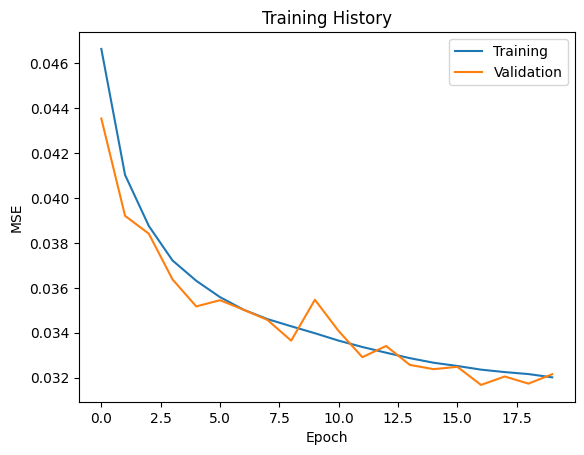

In [228]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Training','Validation'])
plt.show()

In [251]:
enn = keras.models.load_model("enn")

y_pred = enn.predict(X_train)

y_train_df = pd.DataFrame(scaler2.inverse_transform(y_train[0:100]))
y_train_df0 = list(y_train_df[0])
y_train_df1 = list(y_train_df[1])
y_train_df2 = list(y_train_df[2])
y_train_df3 = list(y_train_df[3])

y_pred_df = pd.DataFrame(scaler2.inverse_transform(y_pred[0:100]))
y_pred_df0 = list(y_pred_df[0])
y_pred_df1 = list(y_pred_df[1])
y_pred_df2 = list(y_pred_df[2])
y_pred_df3 = list(y_pred_df[3])

y_pred_test = enn.predict(X_test)

y_test_df = pd.DataFrame(scaler2.inverse_transform(y_test))
y_test_df0 = list(y_test_df[0])
y_test_df1 = list(y_test_df[1])
y_test_df2 = list(y_test_df[2])
y_test_df3 = list(y_test_df[3])

y_pred_test_df = pd.DataFrame(scaler2.inverse_transform(y_pred_test))
y_pred_test_df0 = list(y_pred_test_df[0])
y_pred_test_df1 = list(y_pred_test_df[1])
y_pred_test_df2 = list(y_pred_test_df[2])
y_pred_test_df3 = list(y_pred_test_df[3])

print("Training Set R2 Score:",sklearn.metrics.r2_score(y_train, y_pred))
print("Test Set R2 Score:",sklearn.metrics.r2_score(y_test, y_pred_test))

1375/1375 [==============================] - 3s 2ms/step
Training Set R2 Score: 0.9355116520614097
Test Set R2 Score: 0.9254317790958869


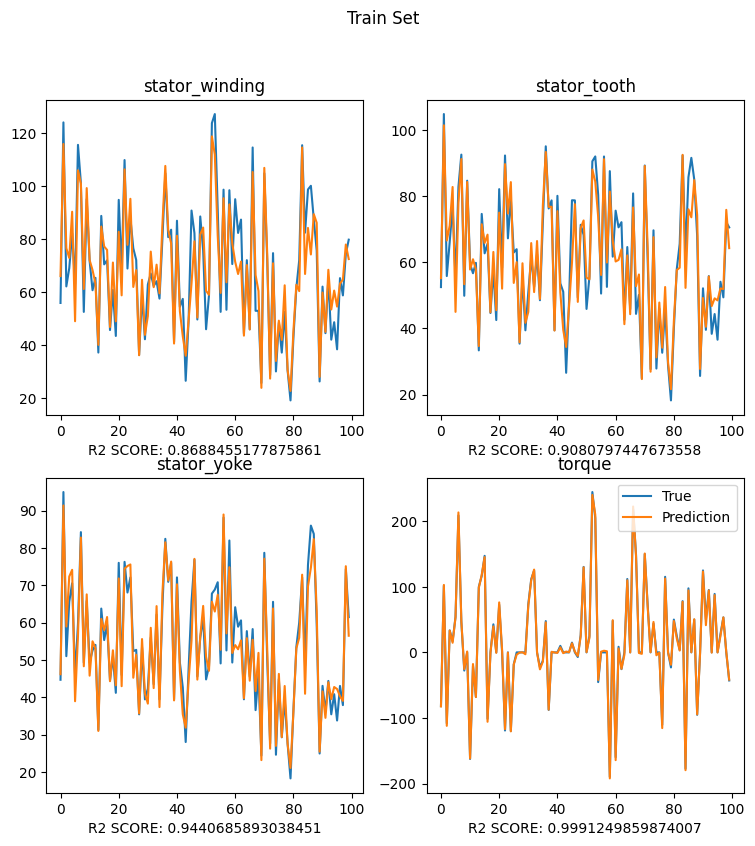

In [262]:
target = ['stator_winding', 'stator_tooth','stator_yoke' ,'torque' ]

R2_score0 = "R2 SCORE: " + str(sklearn.metrics.r2_score(y_train_df0, y_pred_df0))
R2_score1 = "R2 SCORE: " + str(sklearn.metrics.r2_score(y_train_df1, y_pred_df1))
R2_score2 = "R2 SCORE: " + str(sklearn.metrics.r2_score(y_train_df2, y_pred_df2))
R2_score3 = "R2 SCORE: " + str(sklearn.metrics.r2_score(y_train_df3, y_pred_df3))

# Initialise the subplot function using number of rows and columns
plt.figure(figsize=(10, 10))
  
plot0 = plt.subplot2grid((2,2),(0,0))
plot1 = plt.subplot2grid((2,2),(0,1))
plot2 = plt.subplot2grid((2,2),(1,0))
plot3 = plt.subplot2grid((2,2),(1,1))

plot0.plot(y_train_df0)
plot0.plot(y_pred_df0)
plot0.set_title(target[0], )
plot0.set_xlabel(R2_score0)
  
plot1.plot(y_train_df1)
plot1.plot(y_pred_df1)
plot1.set_title(target[1])
plot1.set_xlabel(R2_score1)

plot2.plot(y_train_df2)
plot2.plot(y_pred_df2)
plot2.set_title(target[2])
plot2.set_xlabel(R2_score2)

plot3.plot(y_train_df3)
plot3.plot(y_pred_df3)
plot3.set_title(target[3])
plot3.set_xlabel(R2_score3)

# Combine all the operations and display
plt.legend(['True','Prediction'])
plt.suptitle('Train Set')
plt.show()

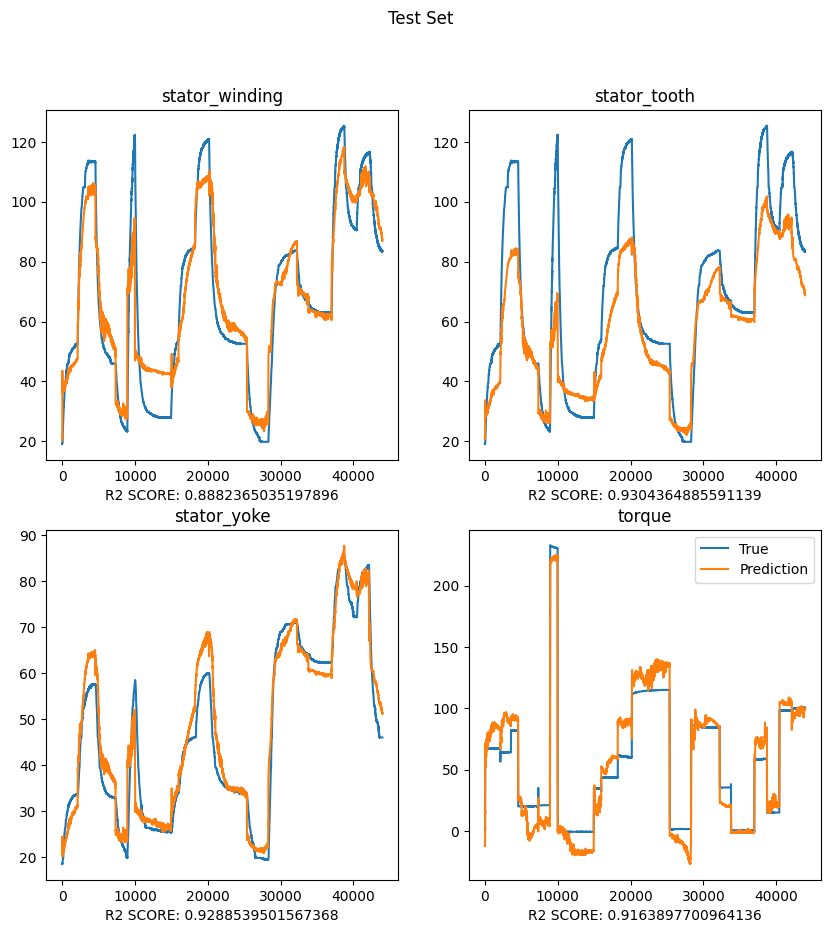

In [268]:
target = ['stator_winding', 'stator_tooth','stator_yoke' ,'torque' ]

R2_score0 = "R2 SCORE: " + str(sklearn.metrics.r2_score(y_test_df0, y_pred_test_df0))
R2_score1 = "R2 SCORE: " + str(sklearn.metrics.r2_score(y_test_df1, y_pred_test_df1))
R2_score2 = "R2 SCORE: " + str(sklearn.metrics.r2_score(y_test_df2, y_pred_test_df2))
R2_score3 = "R2 SCORE: " + str(sklearn.metrics.r2_score(y_test_df3, y_pred_test_df3))

# Initialise the subplot function using number of rows and columns
plt.figure(figsize=(10, 10))
  
plot0 = plt.subplot2grid((2,2),(0,0))
plot1 = plt.subplot2grid((2,2),(0,1))
plot2 = plt.subplot2grid((2,2),(1,0))
plot3 = plt.subplot2grid((2,2),(1,1))

plot0.plot(y_test_df0)
plot0.plot(y_pred_test_df0)
plot0.set_title(target[0])
plot0.set_xlabel(R2_score0)

plot1.plot(y_test_df0)
plot1.plot(y_pred_test_df1)
plot1.set_title(target[1])
plot1.set_xlabel(R2_score1)

plot2.plot(y_test_df2)
plot2.plot(y_pred_test_df2)
plot2.set_title(target[2])
plot2.set_xlabel(R2_score2)

plot3.plot(y_test_df3)
plot3.plot(y_pred_test_df3)
plot3.set_title(target[3])
plot3.set_xlabel(R2_score3)

# Combine all the operations and display
plt.legend(['True','Prediction'])
plt.suptitle('Test Set')
plt.show()

In [232]:
enn = keras.models.load_model("enn")

X_train, X_val, y_train, y_val = train_test_split(X_rnn,y_rnn, test_size = 0.2)

X_train_rnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train_rnn = np.reshape(y_train, (y_train.shape[0],4))
X_val_rnn = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
y_val_rnn = np.reshape(y_val, (y_val.shape[0],4))

In [272]:
ernn = keras.models.load_model("ernn")
history = ernn.fit([X_train_rnn,X_train], y_train, epochs = 20, batch_size = 32,verbose=True,validation_data=([X_val_rnn,X_val], y_val))
ernn.save("ernn")

Epoch 1/20
16086/16086 [==============================] - 140s 8ms/step - loss: 0.0631 - val_loss: 0.0574
Epoch 2/20
16086/16086 [==============================] - 128s 8ms/step - loss: 0.0631 - val_loss: 0.0572
Epoch 3/20
16086/16086 [==============================] - 124s 8ms/step - loss: 0.0629 - val_loss: 0.0577
Epoch 4/20
16086/16086 [==============================] - 124s 8ms/step - loss: 0.0628 - val_loss: 0.0567
Epoch 5/20
16086/16086 [==============================] - 126s 8ms/step - loss: 0.0627 - val_loss: 0.0583
Epoch 6/20
16086/16086 [==============================] - 133s 8ms/step - loss: 0.0627 - val_loss: 0.0590
Epoch 7/20
16086/16086 [==============================] - 127s 8ms/step - loss: 0.0627 - val_loss: 0.0563
Epoch 8/20
16086/16086 [==============================] - 127s 8ms/step - loss: 0.0626 - val_loss: 0.0563
Epoch 9/20
16086/16086 [==============================] - 114s 7ms/step - loss: 0.0625 - val_loss: 0.0565
Epoch 10/20
16086/16086 [=====================

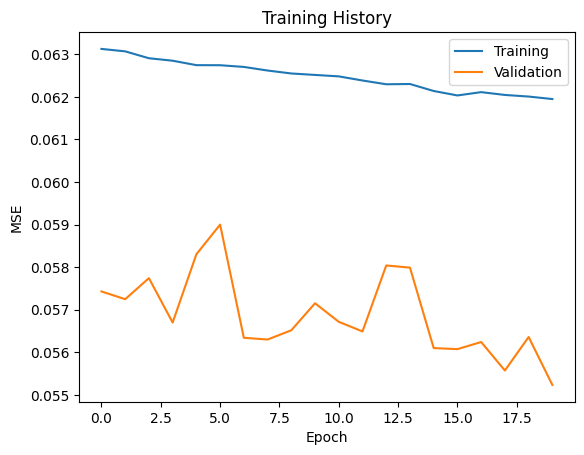

In [273]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Training','Validation'])
plt.show()

In [274]:
ernn = keras.models.load_model("ernn")

y_pred = ernn.predict([X_train_rnn,X_train])

y_train_df = pd.DataFrame(scaler2.inverse_transform(y_train[0:100]))
y_train_df0 = list(y_train_df[0])
y_train_df1 = list(y_train_df[1])
y_train_df2 = list(y_train_df[2])
y_train_df3 = list(y_train_df[3])

y_pred_df = pd.DataFrame(scaler2.inverse_transform(y_pred[0:100]))
y_pred_df0 = list(y_pred_df[0])
y_pred_df1 = list(y_pred_df[1])
y_pred_df2 = list(y_pred_df[2])
y_pred_df3 = list(y_pred_df[3])

X_test_rnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_pred_test = ernn.predict([X_test_rnn,X_test])

y_test_df = pd.DataFrame(scaler2.inverse_transform(y_test))
y_test_df0 = list(y_test_df[0])
y_test_df1 = list(y_test_df[1])
y_test_df2 = list(y_test_df[2])
y_test_df3 = list(y_test_df[3])

y_pred_test_df = pd.DataFrame(scaler2.inverse_transform(y_pred_test))
y_pred_test_df0 = list(y_pred_test_df[0])
y_pred_test_df1 = list(y_pred_test_df[1])
y_pred_test_df2 = list(y_pred_test_df[2])
y_pred_test_df3 = list(y_pred_test_df[3])

print("Training Set R2 Score:",sklearn.metrics.r2_score(y_train, y_pred))
print("Test Set R2 Score:",sklearn.metrics.r2_score(y_test, y_pred_test))

1375/1375 [==============================] - 4s 3ms/step
Training Set R2 Score: 0.9223374430056294
Test Set R2 Score: 0.9176434940000786


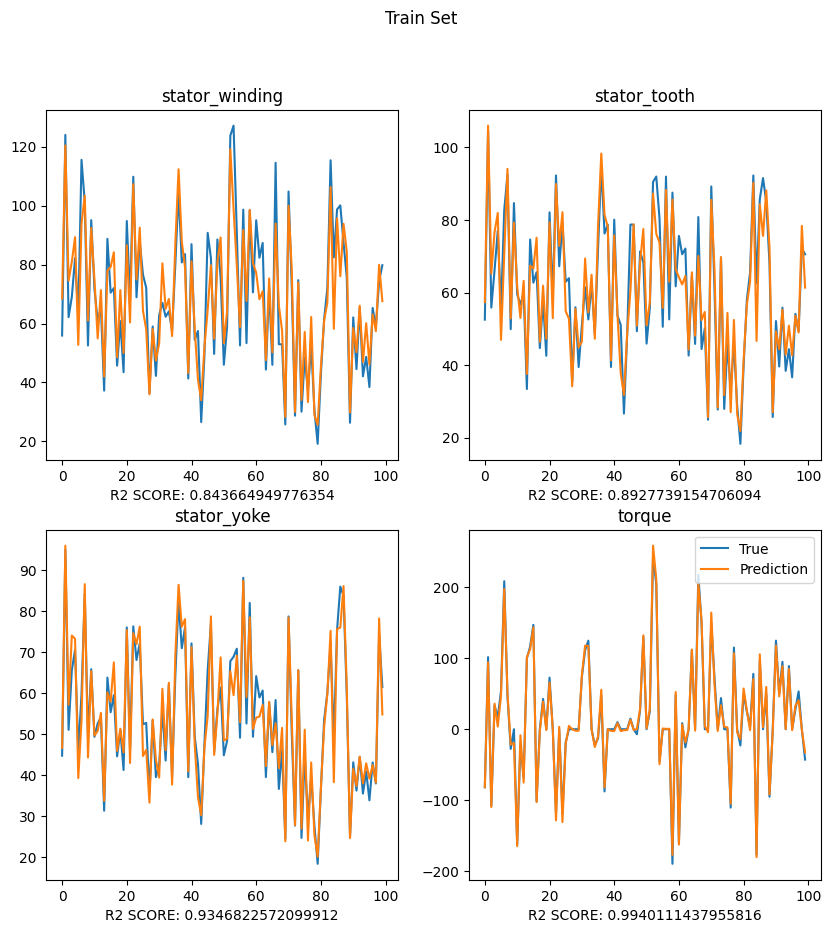

In [275]:
target = ['stator_winding', 'stator_tooth','stator_yoke' ,'torque' ]

R2_score0 = "R2 SCORE: " + str(sklearn.metrics.r2_score(y_train_df0, y_pred_df0))
R2_score1 = "R2 SCORE: " + str(sklearn.metrics.r2_score(y_train_df1, y_pred_df1))
R2_score2 = "R2 SCORE: " + str(sklearn.metrics.r2_score(y_train_df2, y_pred_df2))
R2_score3 = "R2 SCORE: " + str(sklearn.metrics.r2_score(y_train_df3, y_pred_df3))

# Initialise the subplot function using number of rows and columns
plt.figure(figsize=(10, 10))
  
  
plot0 = plt.subplot2grid((2,2),(0,0))
plot1 = plt.subplot2grid((2,2),(0,1))
plot2 = plt.subplot2grid((2,2),(1,0))
plot3 = plt.subplot2grid((2,2),(1,1))

plot0.plot(y_train_df0)
plot0.plot(y_pred_df0)
plot0.set_title(target[0], )
plot0.set_xlabel(R2_score0)
  
plot1.plot(y_train_df1)
plot1.plot(y_pred_df1)
plot1.set_title(target[1])
plot1.set_xlabel(R2_score1)

plot2.plot(y_train_df2)
plot2.plot(y_pred_df2)
plot2.set_title(target[2])
plot2.set_xlabel(R2_score2)

plot3.plot(y_train_df3)
plot3.plot(y_pred_df3)
plot3.set_title(target[3])
plot3.set_xlabel(R2_score3)

# Combine all the operations and display
plt.legend(['True','Prediction'])
plt.suptitle('Train Set')
plt.show()

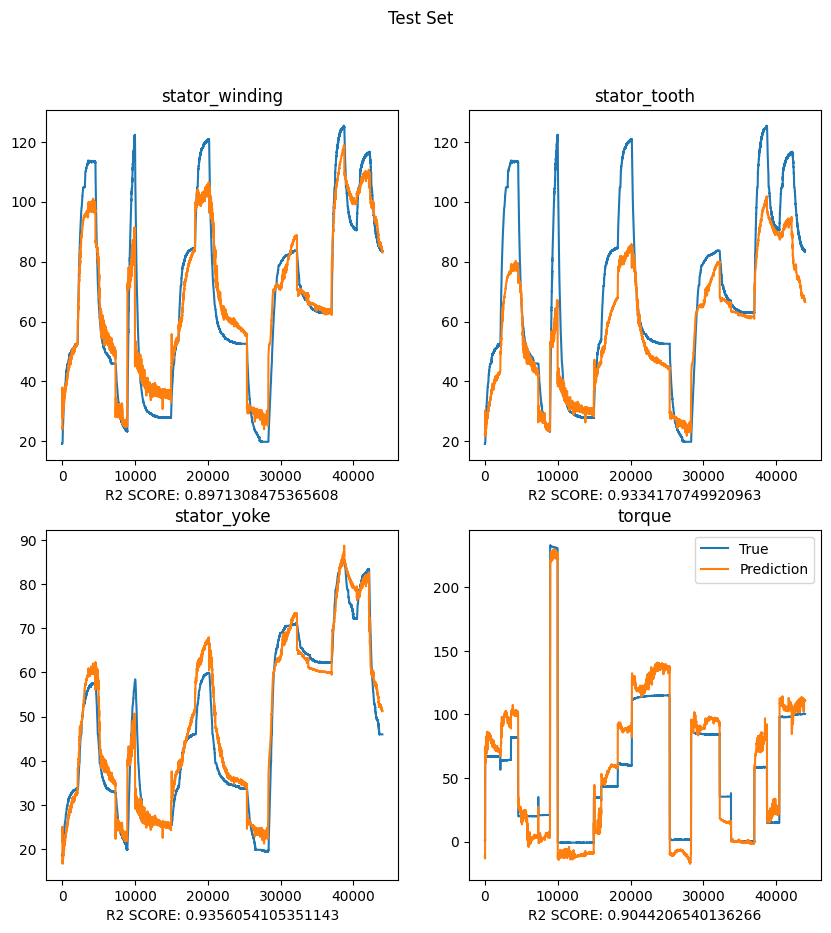

In [276]:
target = ['stator_winding', 'stator_tooth','stator_yoke' ,'torque' ]

R2_score0 = "R2 SCORE: " + str(sklearn.metrics.r2_score(y_test_df0, y_pred_test_df0))
R2_score1 = "R2 SCORE: " + str(sklearn.metrics.r2_score(y_test_df1, y_pred_test_df1))
R2_score2 = "R2 SCORE: " + str(sklearn.metrics.r2_score(y_test_df2, y_pred_test_df2))
R2_score3 = "R2 SCORE: " + str(sklearn.metrics.r2_score(y_test_df3, y_pred_test_df3))

# Initialise the subplot function using number of rows and columns
plt.figure(figsize=(10, 10))
  
plot0 = plt.subplot2grid((2,2),(0,0))
plot1 = plt.subplot2grid((2,2),(0,1))
plot2 = plt.subplot2grid((2,2),(1,0))
plot3 = plt.subplot2grid((2,2),(1,1))

plot0.plot(y_test_df0)
plot0.plot(y_pred_test_df0)
plot0.set_title(target[0])
plot0.set_xlabel(R2_score0)

plot1.plot(y_test_df0)
plot1.plot(y_pred_test_df1)
plot1.set_title(target[1])
plot1.set_xlabel(R2_score1)

plot2.plot(y_test_df2)
plot2.plot(y_pred_test_df2)
plot2.set_title(target[2])
plot2.set_xlabel(R2_score2)

plot3.plot(y_test_df3)
plot3.plot(y_pred_test_df3)
plot3.set_title(target[3])
plot3.set_xlabel(R2_score3)

# Combine all the operations and display
plt.legend(['True','Prediction'])
plt.suptitle('Test Set')
plt.show()